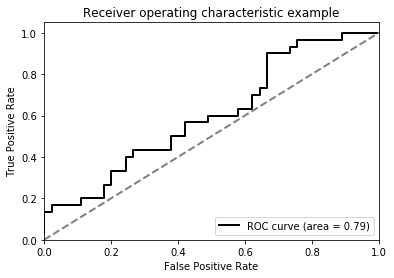

In [168]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  7 18:10:29 2018


In Class Exercise (submit before end of class for +10 extra credit).
******************************************************
Goal: Implement function 
ROC, AUC = createROC(predictedClass, actualClass)
******************************************************

which computes a ROC given list of predicted classes and list of actualClasses.
Specifically construct ROC as a dictionary with entries for "tpr" and "fpr": the 
arrays of the true positive rates and false positive rates.

This function will also compute the area under the curve, AUC using simple Riemann 
estimate.

Compare your results to the existing methods roc_curve and auc in sklearn, by overlaying
the ROCs computed by your function (in blue) and the ROCs computed by sklearn (in black). 


Take-Home Assignment (Extra Credit +20).
******************************************************
Read: ROC Analysis paper posted on course site.
To Do: Implement two more ROC curve creating functions with error bars
******************************************************

Specifically, the creation of a ROC curve can be seen as a trial, the results of which
may vary based on the variability of data. The ROC analysis paper acknowledges this 
concern and addresses it by designing two algorithms which result in ROCs with error bars:
one algorithm addressing variability in TPR and one addressing variability in FPR.

Goals: Implement functions
ROC, AUC = createROCtpr(predictedClass, actualClass)
ROC, AUC = createROCfpr(predictedClass, actualClass)


Resource(s) that may help:
    https://matplotlib.org/
    

@author: jerem
"""

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



# 

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test) #predict_proba
y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
y_class = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
class_num = 1
plt.plot(fpr[class_num], tpr[class_num], color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

# Display your results here.
# plt.plot(..., ..., color='black',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [170]:
y_score[:, 2]

array([ 0.1239796 , -0.16616656, -0.32062486,  0.02184016, -0.71882525,
       -0.05851787, -0.79094201, -0.57154703, -0.38892819, -0.27501927,
       -0.28027547,  0.02538619, -0.13452752, -0.45930643, -0.20026826,
       -0.56156984, -0.24317009, -0.31413579, -0.3909524 ,  0.03129667,
       -0.21412904, -0.51928682,  0.04076059, -0.41083444, -0.1202643 ,
       -0.57664396, -0.8648849 , -0.21652326, -0.49962148, -0.11051706,
       -0.2273942 ,  0.02074984, -0.45378569, -0.00359355,  0.10099661,
       -0.33970555, -0.41773929,  0.12950484, -0.54614202, -0.35868612,
       -0.30068446, -0.18121717,  0.00863558, -0.22892428, -0.20376516,
       -0.05836804, -0.01169663,  0.21330137, -0.23335428,  0.58431039,
       -0.3941874 , -0.32066024,  0.00761443, -0.50579325, -0.21316263,
       -0.10579228, -0.30604104, -0.07437911, -0.27820574, -0.21661728,
       -0.28302624, -0.47723277, -0.37510759, -0.10203375, -0.16931316,
       -0.39954675, -0.1204075 ,  0.41494993, -0.44612973, -0.35

No handles with labels found to put in legend.


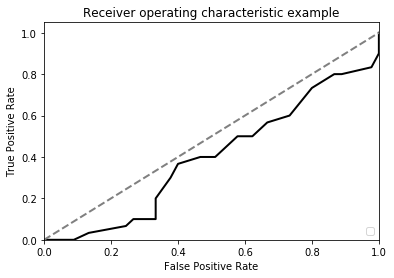

In [163]:
def createROC(y_pred, y_actual):
    
    tpr_dict = dict()
    fpr_dict = dict()
    
    for j in [0, 1, 2]:
        
        tpr_class = []
        fpr_class = []
        y_actual_class = y_actual[:, j]
        
        for threshold in numpy.arange(0, 1.01, 0.01):

            predictedClass = [i.astype(int) for i in y_pred[:, j] >= threshold]
            #print(predictedClass[0])
            TP = 0
            FP = 0
            TN = 0
            FN = 0

            for i in range(len(predictedClass)): 
                #print(predictedClass[i])
                #print(y_actual_class[i])
                if y_actual_class[i] == predictedClass[i] == 1:
                    TP += 1                    
                if predictedClass[i] == 1 and y_actual_class[i]! = predictedClass[i]:
                    FP += 1
                if y_actual_class[i] == predictedClass[i] == 0:
                    TN += 1
                if (predictedClass[i] == 0) and (y_actual_class[i] != predictedClass[i]):
                    FN += 1

            tpr_i = TP / (TP + FN)
            fpr_i = FP / (FP + TN)  

            tpr_class.append(tpr_i)
            fpr_class.append(fpr_i)
        
        tpr_dict[j] = tpr_class
        fpr_dict[j] = fpr_class
       

    return tpr_dict, fpr_dict
    
    
tpr, fpr = createROC(y_prob, y_test)

plt.figure()
class_num = 1
plt.plot(fpr[class_num], tpr[class_num], color='black', lw=2)


plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [143]:
y_prob[:, 1]

array([0.24174159, 0.30121076, 0.34605074, 0.19539083, 0.22445759,
       0.23814442, 0.21781688, 0.14652367, 0.21696056, 0.22018741,
       0.22913104, 0.31851306, 0.30339374, 0.26278235, 0.22172022,
       0.28292909, 0.1812822 , 0.19786889, 0.39517597, 0.37361113,
       0.18500182, 0.26180379, 0.34566072, 0.32018677, 0.21061782,
       0.24220388, 0.19398177, 0.33021464, 0.24423178, 0.32041234,
       0.2521228 , 0.34294127, 0.26560741, 0.26311929, 0.32138171,
       0.23080736, 0.27400975, 0.17549013, 0.30749699, 0.29386924,
       0.21287422, 0.39890993, 0.29384609, 0.33537714, 0.34920074,
       0.35712131, 0.22584099, 0.25597579, 0.20019318, 0.30041588,
       0.22773462, 0.2379415 , 0.31026515, 0.29962998, 0.19370658,
       0.23840533, 0.19715402, 0.27642945, 0.21554853, 0.35872727,
       0.26809256, 0.35368087, 0.34925555, 0.31978696, 0.24892908,
       0.15981808, 0.28578575, 0.26307648, 0.28658625, 0.28477161,
       0.30251403, 0.1884253 , 0.3671223 , 0.3466549 , 0.22661

In [144]:
y_prob[:, 0]

array([0.06019732, 0.35610687, 0.65735935, 0.03458982, 0.53656981,
       0.10187135, 0.56934792, 0.09976567, 0.21754971, 0.16128655,
       0.1884631 , 0.24566846, 0.33543033, 0.47088801, 0.13042431,
       0.64452011, 0.06912446, 0.12310176, 0.8423764 , 0.43945169,
       0.07073614, 0.52390767, 0.31262744, 0.66506278, 0.07742895,
       0.46924453, 0.51563914, 0.5       , 0.42126068, 0.36426869,
       0.22680357, 0.33433706, 0.48706138, 0.13459862, 0.20175325,
       0.23444957, 0.49101317, 0.01519159, 0.72233862, 0.50500649,
       0.15554425, 0.70503819, 0.19306875, 0.53678102, 0.56315491,
       0.4314826 , 0.07042163, 0.05791958, 0.09855577, 0.0278572 ,
       0.26457565, 0.25713061, 0.2331307 , 0.66028716, 0.08264416,
       0.12288343, 0.12038704, 0.19496786, 0.14888145, 0.6141974 ,
       0.33259338, 0.79821282, 0.70627953, 0.36580752, 0.18430035,
       0.07874082, 0.24976239, 0.026996  , 0.56772859, 0.46741973,
       0.1927165 , 0.26890534, 0.71663867, 0.76250345, 0.20199

In [145]:
y_prob[:, 2]

array([0.8293423 , 0.46392587, 0.25675446, 0.72575167, 0.03221816,
       0.6233162 , 0.02104212, 0.07210959, 0.18709588, 0.31178975,
       0.30512397, 0.72992812, 0.51087526, 0.13153949, 0.41436576,
       0.07618068, 0.3559114 , 0.2641855 , 0.18527242, 0.73679985,
       0.39490092, 0.09586649, 0.7475668 , 0.16808899, 0.53204179,
       0.07010812, 0.01357372, 0.39159059, 0.10649034, 0.54647034,
       0.37677007, 0.72445947, 0.13533461, 0.6946515 , 0.80908542,
       0.2357096 , 0.16242648, 0.83395135, 0.08289216, 0.21598945,
       0.28002174, 0.4418251 , 0.70985179, 0.3747127 , 0.40940914,
       0.62353909, 0.68433814, 0.89217202, 0.36879716, 0.98684094,
       0.1823868 , 0.25671432, 0.70859975, 0.10304903, 0.39624165,
       0.55345325, 0.27364633, 0.59980895, 0.30773921, 0.39146093,
       0.30166757, 0.11983499, 0.19991529, 0.55900367, 0.4592841 ,
       0.17768332, 0.53182957, 0.964808  , 0.14074998, 0.22271583,
       0.75625608, 0.05785893, 0.28417647, 0.1428738 , 0.27628

In [146]:
y_test[:, 2]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0])

In [177]:
len(y_test)

75

In [172]:
# using methord in paper for in class
import math
def createROC(f, L):
    L_sorted = L.copy()
    L_sorted = [L[i] for i in np.argsort(f)[::-1]]
    TP = 0
    FP = 0
    R = []
    fprev = -math.inf
    P = len(L[L == 1])
    N = len(L[L == 0])
    i = 0
    while i <= len(L_sorted) - 1: 
        if f[i] != fprev:
            R.append((FP/N, TP/P))
            fprev = f[i]
        if L_sorted[i] == 1: 
            TP = TP + 1
        else:
            FP = FP + 1
        i = i + 1
    R.append((FP/N, TP/P))    
    fpr = [j[0] for j in R]
    tpr = [j[1] for j in R]
    
    AUC = 0
    for i in range(len(fpr)-1):
        AUC = AUC + (fpr[i+1] - fpr[i]) * tpr[i+1]
        
    return R, AUC


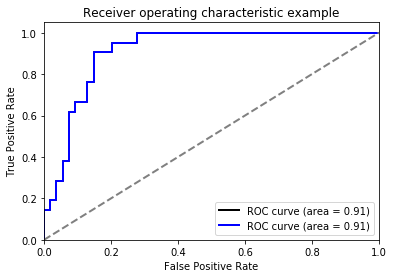

In [176]:
plt.figure()
lw = 2
class_num = 0
R, AUC = createROC(y_score[:, class_num], y_test[:, class_num])
plt.plot(fpr[class_num], tpr[class_num], color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[class_num])
plt.plot([j[0] for j in R], [j[1] for j in R], color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Take Home

In [ ]:
# shuffle and split training and test sets
nrocs = 100
y_score_list = []
y_test_list = []
for i in range(nrocs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=i)
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                     random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    y_score_list.append(y_score[:, 2])
    y_test_list.append(y_test[:, 2])



In [205]:
import math
def createROC(f, L):
    L_sorted = L.copy()
    L_sorted = [L[i] for i in np.argsort(f)[::-1]]
    TP = 0
    FP = 0
    R = []
    fprev = -math.inf
    P = len(L[L == 1])
    N = len(L[L == 0])
    i = 0
    while i <= len(L_sorted) - 1: 
        if f[i] != fprev:
            R.append((FP/N, TP/P))
            fprev = f[i]
        if L_sorted[i] == 1: 
            TP = TP + 1
        else:
            FP = FP + 1
        i = i + 1
    R.append((FP/N, TP/P)) 
    
    ROC = {}
    fpr = [j[0] for j in R]
    tpr = [j[1] for j in R]
    
    ROC['tpr'] = tpr
    ROC['fpr'] = fpr
    
    AUC = 0
    for i in range(len(fpr)-1):
        AUC = AUC + (fpr[i+1] - fpr[i]) * tpr[i+1]
        
    return ROC, AUC


def INTERPOLATE(tpr1,fpr1,tpr2,fpr2,x):
    slope = (tpr2 - tpr1)/(fpr2-fpr1)
    return tpr1 + slope*(x-fpr1)

def TPR_FOR_FPR(fpr_sample,ROC,npts):
    i = 0
    while i<npts and ROC['fpr'][i+1] <= fpr_sample:
        i += 1
    if ROC['fpr'][i] == fpr_sample:
        return ROC['tpr'][i]
    else:
        return INTERPOLATE(ROC['tpr'][i],ROC['fpr'][i],ROC['tpr'][i+1],ROC['fpr'][i+1],fpr_sample)

def createROCtpr(predC, actualC):
    ROCS = []
    AUCS = []
    tpravg = []
    ROC_avg = []
    for i in range(len(predC)):
        actual_class = actualC[i]
        predict_class = predC[i]
        ROC, AUC = createROC(predict_class, actual_class)
        ROCS.append(ROC)
        AUCS.append(AUC)
    samples = 20
    npts = [len(l) for l in predC]
    fpr = list(np.linspace(0, 1, samples, endpoint=False))
    for fpr_sample in fpr:
        tprsum = 0
        for i in range(nrocs):
            tprsum += TPR_FOR_FPR(fpr_sample, ROCS[i], npts[i])
        tpravg.append(tprsum/nrocs)
    ROC_avg['tpr'] = tpravg
    ROC_avg['fpr'] = fpr
    
    ROC_avg.append((fpr, tpravg))
    
    AUC_avg = 0
    for i in range(len(tpravg)-1):
        AUC_avg += tpravg[i]*(fpr[i+1] - fpr[i])
    return ROC_avg,AUC_avg


ROC, AUC = createROCtpr(y_score_list, y_test_list)

plt.figure()
lw = 2
class_num = 0
ROC, AUC = createROC(y_score[:, class_num], y_test[:, class_num])
#plt.plot(fpr[class_num], tpr[class_num], color='black',
         #lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[class_num])
plt.plot([j[0] for j in ROC], [j[1] for j in ROC], color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

0.08333333333333333
0.07407407407407407
0.08
0.08695652173913043
0.08695652173913043
0.08333333333333333
0.08
0.08
0.08333333333333333
0.045454545454545456
0.08
0.07142857142857142
0.08695652173913043
0.07407407407407407
0.09523809523809523
0.07692307692307693
0.1
None


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [197]:
len(y_score_list)

100

In [ ]:
def INTERPOLATE(ROCP1, ROCP2, X):
    slope = (ROCP2[1] - ROCP1[1]) / (ROCP2[0] - ROCP1[0])
    return ROCP1[1] + slope * (X - ROCP1[0])

def TPR_FOR_FPR(fprsample, ROC, npts):
    i = 0
    while i < (npts -1) and ROC[i + 1][0] <= fprsample:
        i = i + 1
        if ROC[i + 1][0] == fprsample:
            return ROC[i + 1][1]
        else:
            return INTERPOLATE(ROC[i], ROC[i+1], fprsample)

def createROCtpr(predictedClass, actualClass):
    
    ROCS = []
    AUCS = []
    for i in range(len(y_score_list)):
        y_test_i = y_test_list[i]
        y_score_i = y_score_list[i] 
        ROC, AUC = createROC(y_score_i, y_test_i)
        ROCS.append(ROC)
        AUCS.append(AUC)
        
    sample = 50
    #nrocs = len(y_score_list)
    npts = [len(i) for i in y_score_list]
    
    tpravg = []
    fpr_list = list(np.linspace(0, 1, sample))
    R = []
    for i in fpr_list:
        tprsum = 0
        for j in range(nrocs):
            #print(len(npts[j]))
            result = TPR_FOR_FPR(i, ROCS[j], npts[j])
            print(result)
            tprsum = tprsum + result
        tpravg_j = tprsum/nrocs
        tpravg.append(tpravg_j)
        R.append((i, tpravg_j))
    AUC = 0
    for n in range(len(tpravg - 1)):
            AUC = AUC + (fpr_list[n+1] - fpr_list[n]) * tpravg[n+1]
    
    return R, AUC 

ROC, AUC = createROCtpr(y_score_list, y_test_list)

plt.figure()
lw = 2
class_num = 0
ROC, AUC = createROC(y_score[:, class_num], y_test[:, class_num])
#plt.plot(fpr[class_num], tpr[class_num], color='black',
         #lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[class_num])
plt.plot([j[0] for j in ROC], [j[1] for j in ROC], color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()